# **Cybersecurity Attacks Exploratory Data Analysis (EDA)**
# By(Shaikha Bin Ateeq )

# **Introduction** :

Organizations are becoming more vulnerable to cyber threats because of the growing global reliance on computers, networks, programs, social media, and data Data breaches, a typical cyber attack, have a huge negative impact on businesses and are frequently caused by inadequately safeguarded data.For information security, it's no longer enough to rely on traditional IT personnel and security protocols. Threat intelligence tools and security programs are clearly needed to lower your organization's cyber risk and identify potential attack surfaces. I intend to work with data on cybersecurity attacks that I obtained from Kaggle, which recorded the events of various cybersecurity attacks of varying durations and patterns.[ In this project, I will be using Exploratory Data Analysis approach as known as EDA, which aims to analyze and investigate data sets and summarize their main characteristics mostly by employing data visualization methods. However I am planning to understand the the patterns of Cybersecurity attacks and the Most Logical Ports attacked and the common type of attacks in additions the Different time of the day , (hours,night,morning ) and so on The goal of these analyzes is to know the origin and type of attacks and to try to raise the level of protection in those vulnerabilities



# **Data Overview :**

The data will help us understand the nature of Cybersecurity attacks and raising the level of protection in the port where cyber-attacks often occur The features provided in the dataset are:

Attack category : Type of registered cybersecurity attack

* Attack category : Type of registered cybersecurity attack

*  Attack subcategory: A subcategory of the type of cybersecurity attack registered

* Attack Name: The technical name for the cybersecurity attack

* Time: Start and end date of the attack in timestamp format

* Protocol: The protocol used for the attack.

* Source IP: IPv4 address where the attack came from.

* Source Port: The logical port where the attack came from.

* Destination IP: Destination IPv4 address.

* Destination Port: Logical destination port


**Import Library:**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import numpy as np
import math
import copy 
from datetime import datetime, timedelta
import calendar
from datetime import date
plt.style.use('seaborn-white')
from scipy import stats


import ipaddress
from scipy.stats import chi2_contingency
import missingno as msno
import warnings
warnings.filterwarnings('ignore') 

**Import Database :**

In [2]:
engine = create_engine("sqlite:///CyberAttacks.db") 

In [3]:
all_tables = engine.table_names()
all_tables

['Cybersecurity_attacks', 'TCP-ports']

**Explore the Database:**

In [4]:
df=pd.read_sql('select * FROM Cybersecurity_attacks;', engine)


In [5]:
df.head(4)

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417


# **Cleanning Part :**

In [6]:
df_before_cleeaning=df.copy() # copy the datafream before cleanning 

In [7]:
df.shape 

(178031, 11)

In [8]:
df[['Start time','End time']] = df['Time'].str.split('-',expand=True) #split the time into start and end time
df.head()

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,.,Time,Start time,End time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


In [9]:
df['.'].unique()# there is no benfit for this columns 

array(['.'], dtype=object)

In [10]:
df = df.drop(['.', 'Time'],axis=1)# Drop the two "." and 'time' 
df.head()

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,Start time,End time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [11]:
df.isnull().sum() # check from null value

Attackcategory           0
Attacksubcategory     4476
Protocol                 0
SourceIP                 0
SourcePort               0
DestinationIP            0
DestinationPort          0
AttackName               0
AttackReference      51745
Start time               0
End time                 0
dtype: int64

In [12]:
df["Attacksubcategory"] = df["Attacksubcategory"].fillna("Not Registered") # since the subcategory not definde let it as Not Registered

In [13]:
df.isnull().sum()

Attackcategory           0
Attacksubcategory        0
Protocol                 0
SourceIP                 0
SourcePort               0
DestinationIP            0
DestinationPort          0
AttackName               0
AttackReference      51745
Start time               0
End time                 0
dtype: int64

In [14]:
print(df[pd.isnull(df['AttackReference'])]['Attackcategory'].value_counts()) #to know which attack category have the most null in attacks refreance

Fuzzers           30297
Reconnaissance    18538
Analysis           1657
Shellcode           761
Generic             351
Backdoor             68
DoS                  56
Worms                12
Exploits              5
Name: Attackcategory, dtype: int64


In [15]:
# Percentage of missing values in 'Attack Reference' per Attack Category
((df[pd.isnull(df['AttackReference'])]['Attackcategory'].value_counts()/df['Attackcategory'].value_counts())*100).dropna().sort_values(ascending=False)

Reconnaissance    90.117155
Fuzzers           88.172638
Analysis          85.721676
Shellcode         49.383517
Worms              6.936416
Generic            1.729405
Backdoor           1.622137
DoS                0.222957
Exploits           0.007185
Name: Attackcategory, dtype: float64

In [16]:
df.head()

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,Start time,End time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [17]:
df[df.duplicated()].shape  # check from duplicated

(6, 11)

In [18]:
print('The Dimensions before dropping duplicated rows: ' + str(df.shape))
df = df.drop(df[df.duplicated()].index)
print('The Dimensions after dropping duplicated rows: ' + str(df.shape))

The Dimensions before dropping duplicated rows: (178031, 11)
The Dimensions after dropping duplicated rows: (178025, 11)


Well-Known Ports Port numbers can run from 0 to 65353 since.The highest TCP port number is 65,535. The TCP protocol provides 16 bits for the port number, and this is interpreted as an unsigned integer; all values are valid, apart from 0, and so the largest port number is (2^16 - 1) or 65,535 [1] 

In [19]:
invalid_SourcePort = (df['SourcePort'] < 0) | (df['SourcePort'] > 65535)
invalid_DestinationPort = (df['DestinationPort'] < 0) | (df['DestinationPort'] > 65535)
df[invalid_SourcePort | invalid_DestinationPort].head()

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,Start time,End time
174347,Generic,IXIA,udp,175.45.176.1,67520,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...,1421933561,1421933561
174348,Exploits,Browser,tcp,175.45.176.3,78573,149.171.126.18,110,Microsoft Internet Explorer 6.0 Png pngfilt.dl...,BPS 2010-0002 (https://strikecenter.bpointsys....,1421932490,1421932491
174349,Reconnaissance,HTTP,tcp,175.45.176.1,71804,149.171.126.10,80,Domino Web Server Database Access: /internet.n...,None,1424236143,1424236143
174350,DoS,Ethernet,pnni,175.45.176.3,0,149.171.126.19,-753,Cisco IPS Jumbo Frame System Crash (https://st...,CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...,1424230284,1424230284
174351,Fuzzers,OSPF,trunk-1,175.45.176.0,73338,149.171.126.13,0,Fuzzer: OSPF Hello Packet: Long Neighbor Lists...,None,1424223172,1424223172


In [20]:
df = df[~(invalid_SourcePort | invalid_DestinationPort)].reset_index(drop=True) 


In [21]:
df.shape

(174341, 11)

In [22]:
print("Attack category:",df['Attackcategory'].unique()) # there is duplicated such as tcp and TCP
print('Protocol:',df['Protocol'].unique()[:15]) # Backdoor vs Backdoors 

Attack category: ['Reconnaissance' 'Exploits' 'DoS' 'Generic' 'Shellcode' 'Fuzzers' 'Worms'
 'Backdoors' 'Analysis' 'Backdoor']
Protocol: ['tcp' 'udp' 'Tcp' 'UDP' 'ospf' 'sctp' 'sep' 'mobile' 'sun-nd' 'swipe'
 'pim' 'ggp' 'ip' 'ipnip' 'st2']


In [23]:
df['Protocol'] = df['Protocol'].str.upper().str.strip()
df['Attackcategory'] = df['Attackcategory'].str.upper().str.strip()
df['Attackcategory'] = df['Attackcategory'].str.strip().replace('BACKDOORS','BACKDOOR')

df.head()

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,Start time,End time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [24]:
df['Start time'] = pd.to_datetime(df['Start time'], unit='s')
df['End time'] = pd.to_datetime(df['End time'], unit='s')
df['Duration'] = ((df['End time'] - df['Start time']).dt.seconds).astype(int)
df['hour'] = df.apply(lambda row: '0'*(2-len(str(row['Start time'].hour)))+str(row['Start time'].hour)+':00:00', axis=1)
df['Month'] = df['End time'].dt.month
df['Day'] = df['End time'].dt.day

df

,Attackcategory,Attacksubcategory,Protocol,SourceIP,SourcePort,DestinationIP,DestinationPort,AttackName,AttackReference,Start time,End time,Duration,hour,Month,Day
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,2,11:00:00,1,22
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,0,11:00:00,1,22
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,0,11:00:00,1,22
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,0,11:00:00,1,22
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,0,11:00:00,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174336,DOS,IGMP,TCP,175.45.176.0,33654,149.171.126.12,80,Microsoft IIS Repeated Parameter Request Denia...,CVE 2010-1899 (http://cve.mitre.org/cgi-bin/cv...,2015-02-18 12:21:06,2015-02-18 12:21:09,3,12:00:00,2,18
174337,FUZZERS,SMB,TCP,175.45.176.3,36468,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Username (NT...,None,2015-02-18 12:21:07,2015-02-18 12:21:08,1,12:00:00,2,18
174338,RECONNAISSANCE,SunRPC Portmapper (TCP) UDP Service,TCP,175.45.176.2,64395,149.171.126.18,111,SunRPC TCP Portmapper GETPORT Request (ippathv...,None,2015-02-18 12:21:07,2015-02-18 12:21:08,1,12:00:00,2,18
174339,GENERIC,IXIA,UDP,175.45.176.0,47439,149.171.126.10,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,2015-02-18 12:21:08,2015-02-18 12:21:08,0,12:00:00,2,18


# **Exploratory Data Analysis (EDA)**

In [25]:
df_AfterCleanning=df.copy() # creat a new copy before EDA

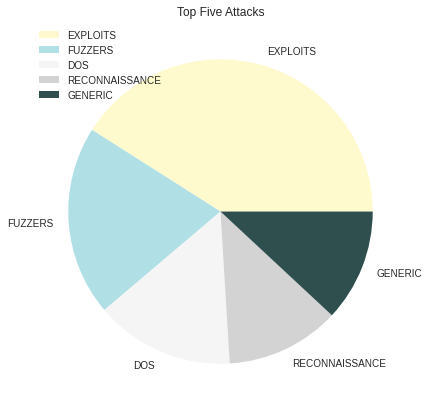

In [26]:
x=pd.DataFrame(df['Attackcategory'].value_counts())[:5]
colors = ['lemonchiffon', 'powderblue','whitesmoke','lightgray','darkslategray','darkseagreen']

x.plot(kind='pie', subplots=True, figsize=(7, 7) ,colors=colors)
plt.title('Top Five Attacks')
plt.legend(loc='upper left')
plt.ylabel('')
plt.show()
#plt.savefig('pie.png',dpi=250)

Text(0.5, 1.0, 'Number of attacks per Attack caterogy')

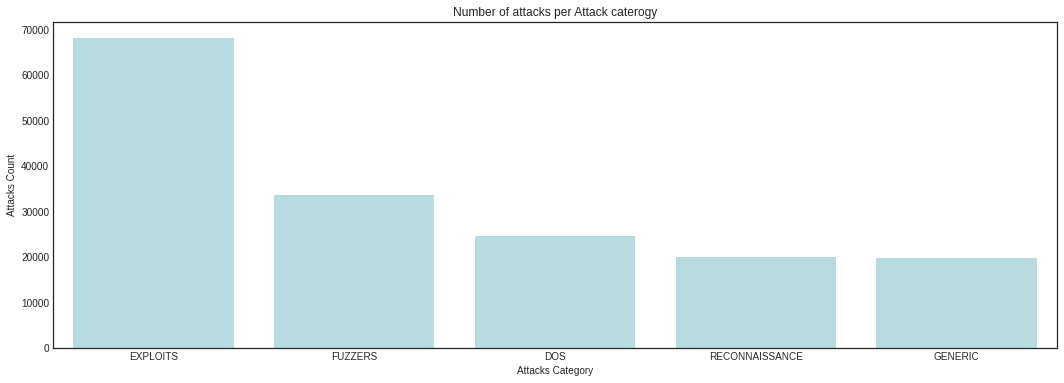

In [27]:
plt.figure(figsize=(18,6))
sns.barplot(x=(df['Attackcategory'].value_counts().index)[:5],y=(df['Attackcategory'].value_counts())[:5],color='powderblue')
plt.xlabel('Attacks Category')
plt.ylabel('Attacks Count')
plt.title('Number of attacks per Attack caterogy')


the most common cybersecurity attacks are (Exploit, Fuzzers, DoS,Reconnaissance, Generic)

In [28]:
DfDummies = pd.get_dummies(df, columns=['Attackcategory']) 

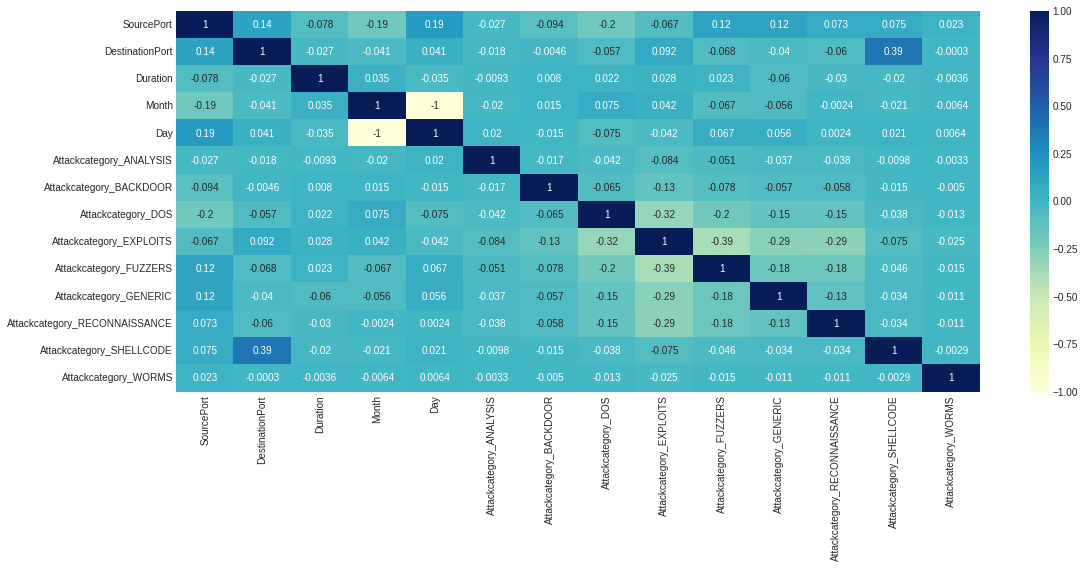

In [47]:
plt.figure(figsize=(18,7))
sns.heatmap(DfDummies.corr(), annot=True ,cmap="YlGnBu")
plt.show()

Correlation results suggest that although the relationship between this pair of variables is linearly weak, there is a strong monotonic relationship between them 



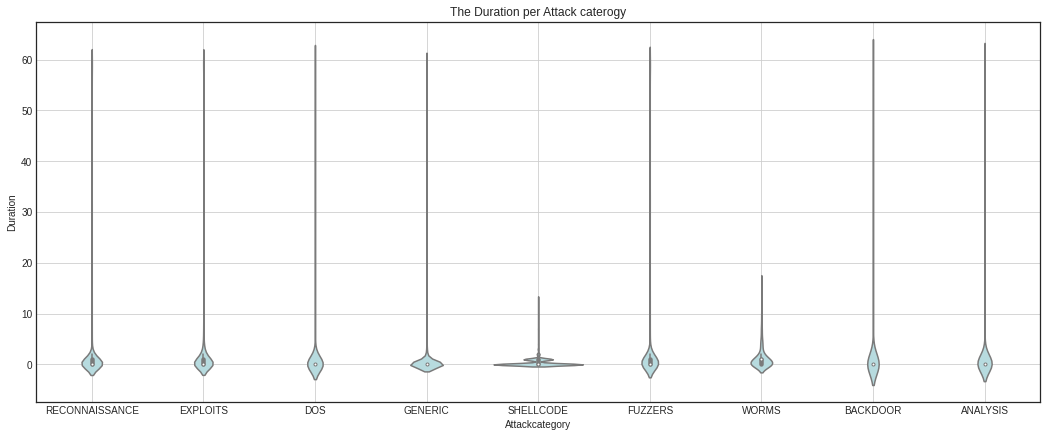

In [30]:
plt.figure(figsize=(18,7))
sns.violinplot(x='Attackcategory', y='Duration', data=df,color='powderblue')
plt.title('The Duration per Attack caterogy')
plt.grid(True)
plt.show()

There were two types of attacks that do not record times greater than 20 seconds, the shellcode and the worms. Most distributions are normal distributions, except for the one found in shellcode, which has two peaks, indicating a bimodal distribution (two different modes)  


In [31]:
df_pivot = df.copy()
df_pivot1 = pd.pivot_table(df_pivot,values='AttackName', index=['hour'], columns=['Attackcategory'], aggfunc='count')

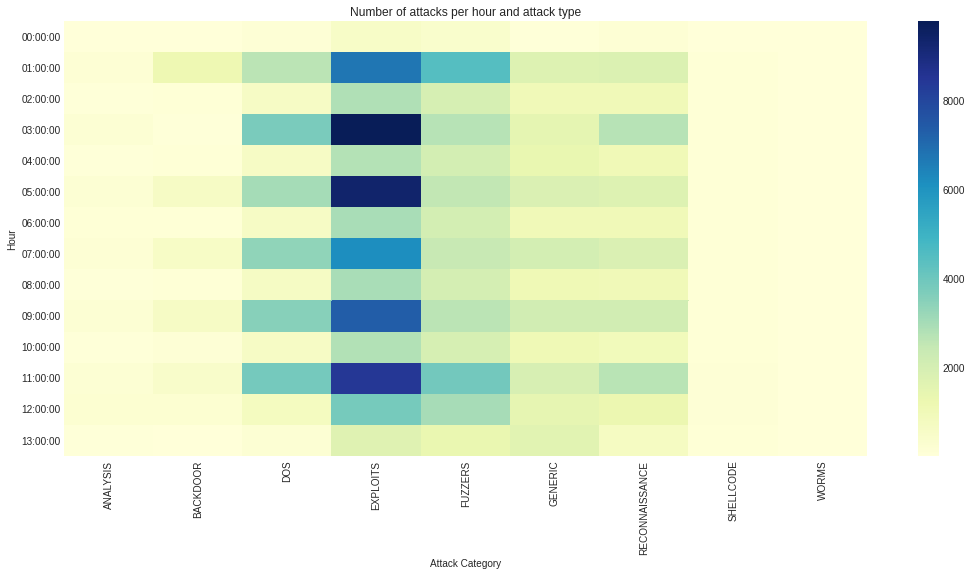

In [45]:
plt.figure(figsize=(18,8))
ax = sns.heatmap(df_pivot1,cmap="YlGnBu")
sns.color_palette("mako")
plt.xlabel('Attack Category')
plt.ylabel('Hour')
plt.title('Number of attacks per hour and attack type')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

There was a peculiar pattern in the attacks, especially for Denial of Service and Exploit attacks. The attacks were made with more intensity at odd hours 


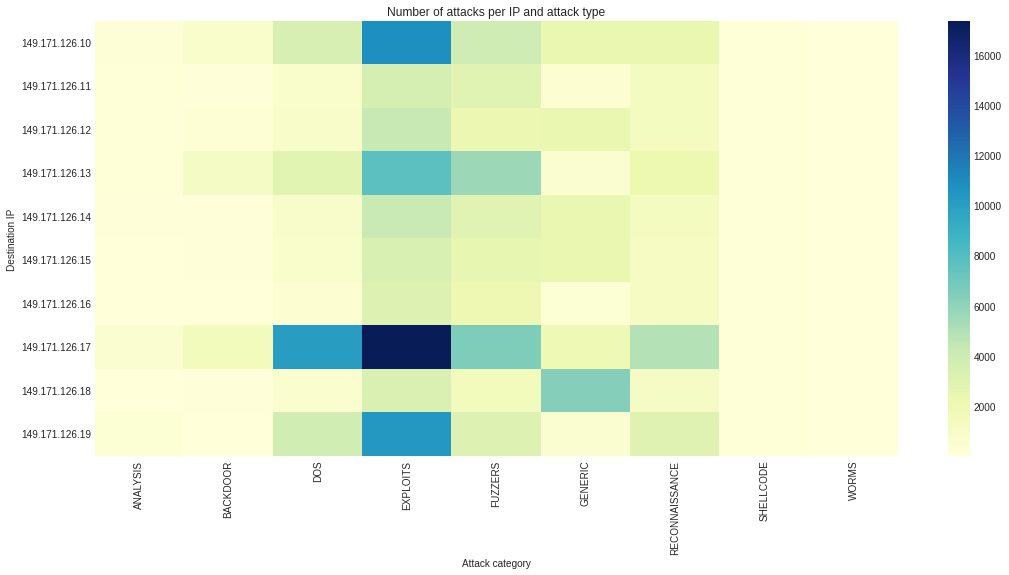

In [44]:
df_pivot2 = pd.pivot_table(df_pivot, values='AttackName', index=['DestinationIP'], columns=['Attackcategory'], aggfunc='count')
plt.figure(figsize=(18,8))
ax = sns.heatmap(df_pivot2,cmap="YlGnBu")
plt.xlabel('Attack category')
plt.ylabel('Destination IP')
plt.title('Number of attacks per IP and attack type')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


The most attacked machine is the one with the IPv4 address 149.171.126.17. Conversely, while worms, shellcode and generic attacks are not directed at particular machines, Denial of Services, Exploits and Backdoor attacks are clearly targeted towards specific servers.

# **Conclusion:**

In the end, we summarize that the most common cybersecurity attacks are (Exploit, Fuzzers, DoS,Reconnaissance, Generic)
Duration for each attack ranges from 1 minute except the Exploit and worms range to 20 secound 
In addition, we concluded that the most commonly accessed logical ports are: 149.171.126.17.  also 
The number of attacks per hour and the type of attack,that the attacks occurs in odd hours




# **reference:**



*   https://www.sciencedirect.com/topics/computer-science/registered-port
*   https://www.researchgate.net/publication/349407966_Exploratory_data_analysis_for_cybersecurity
* https://research.unsw.edu.au/projects/unsw-nb15-dataset


